# Loan Status Prediction Using Support Vector Machine Model

In [1]:
# Import the library 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
# Loading the data 
loan_data = pd.read_csv(r"C:\Users\utkar\100 days ML\Loan Status Prediction\loan_dataset.csv")

In [3]:
# top 5 dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# total number of rows and columns 
loan_data.shape

(614, 13)

In [5]:
# Checking for null values 
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# statistical Measures
loan_data.describe() # it do not give the information about categorical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# as several categorical data in the column of missing values
loan_data = loan_data.dropna()

In [8]:
# now after droping the missing value
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Label Encoding 
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace =True)

C:\Users\utkar\AppData\Local\Temp\ipykernel_12052\3079422869.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace =True)


In [10]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
# Dependent column values
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [27]:
# replacing the value of 3+ to 4 
loan_data = loan_data.replace(to_replace= '3+', value=4)

In [28]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

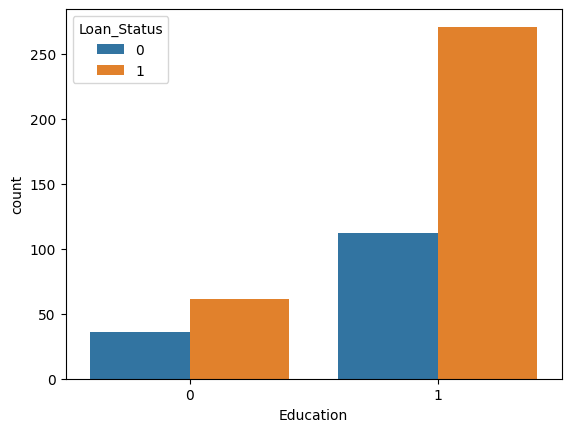

In [29]:
# Data visulization 
# eduction and Loan_Status
sns.countplot(x= 'Education' , hue='Loan_Status', data = loan_data)

<Axes: xlabel='Married', ylabel='count'>

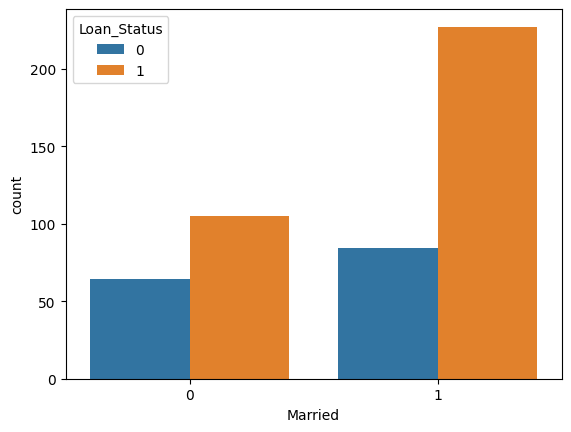

In [30]:
# visulization for marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status', data=loan_data)

<Axes: xlabel='Gender', ylabel='count'>

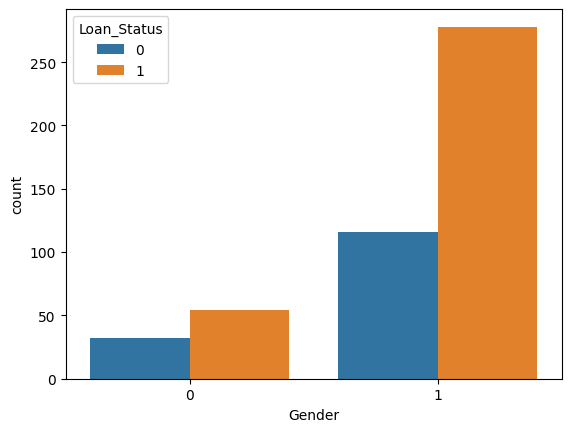

In [31]:
# visulization for gender & Loan Status 
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

In [32]:
# convert categorical  column to numberical column 
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}
                              ,'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},
                             inplace=True)

In [33]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [34]:
# separating the data and label
x = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_data['Loan_Status']

In [35]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [36]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [37]:
# spliting the data 
X_train ,X_test,Y_train , Y_test=train_test_split(x,y,test_size = 0.1, stratify = y ,random_state=2) 

In [38]:
# Shape of value
print(x.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [39]:
# training the model using svm 
classifier = svm.SVC(kernel='linear')

In [40]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [42]:
# modal evaluation  on training data 
X_train_prediction= classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("The accuracy score on training data :",training_data_accuracy )


The accuracy score on training data : 0.7986111111111112


In [43]:
# modal evaluation  on testing data 
X_test_prediction= classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("The accuracy score on testing data  :",test_data_accuracy )

The accuracy score on testing data  : 0.8333333333333334


In [60]:
# predictive system 
input_data = ("Male","Yes","3+","Graduate","No",3036,2504,158,360,0,"Semiurban")
#input_data = ("Male", "Yes", 0, "Graduate", "Yes", 3000, 0, 66, 360, 1, "Urban")

# Dictionary for mapping categorical variables to numbers
mapping = {
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1, 'Female': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Dependents':{'3+':4}
}

# Applying the mapping to input_data
numerical_data = list(input_data)  # First, create a mutable list from the input tuple

# Replace string values with their numerical counterparts
for i, value in enumerate(numerical_data):
    for key, mapping_dict in mapping.items():
        if value in mapping_dict:
            numerical_data[i] = mapping_dict[value]
            break  # Stop looking once a replacement is made

# Convert to a numpy array
data_array = np.asarray(numerical_data)

# Reshape the array for model input
reshape_data = data_array.reshape(1, -1)

# Assuming 'model' is a trained model instance you have loaded
prediction = classifier.predict(reshape_data)
print(prediction)

[0]


C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [61]:
if prediction[0] == 1:
    print("The loan is Approved")
else : 
    print("The loan is not Approved")

The loan is not Approved
